In [1]:
import numpy as np
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas_datareader.data as web
import datetime as dt
start=dt.datetime(2000,1,1)
end=dt.datetime(2019,11,11)
df=web.DataReader('SPY','yahoo',start,end)

In [2]:
df=df.resample('30D').mean()
df=df.dropna()
df=df.iloc[:,:5]

In [3]:
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2000-01-03,144.331845,141.094494,143.164435,142.675595,7.866224e+06
2000-02-02,140.327381,137.750744,139.379464,138.925595,9.189838e+06
2000-03-03,146.686756,143.098214,144.543155,145.194196,1.110127e+07
2000-04-02,148.196094,144.177344,146.412500,146.373437,1.182872e+07
2000-05-02,143.365327,140.449405,142.178571,141.776042,7.318843e+06


C:\Users\joaod\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


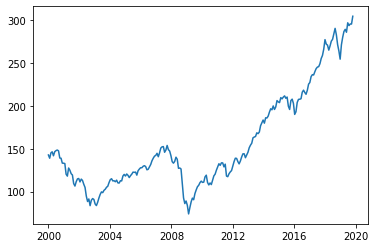

In [4]:
plt.plot(df['Close'])
plt.show()

In [5]:
df['S_100'] = df['Close'].rolling(window=100).mean()
df['S_200'] = df['Close'].rolling(window=20).mean()
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10) 
df=df.dropna()

In [6]:
df.head()

,High,Low,Open,Close,Volume,S_100,S_200,RSI
Date,,,,,,,,
2008-02-20,134.459545,131.492727,133.041364,133.162274,2.687100e+08,121.940044,142.935401,37.596318
2008-03-21,136.096000,134.238000,135.085001,135.191501,1.926250e+08,121.865203,143.260453,41.344807
2008-04-20,140.893808,139.153333,140.019048,140.101906,1.693512e+08,121.876966,143.685119,49.500765
2008-05-20,138.909999,136.927144,138.079525,137.717619,2.218824e+08,121.802201,143.773091,46.046439
2008-06-19,128.606190,126.100000,127.548095,127.147619,3.300919e+08,121.609942,143.185130,34.267469


In [10]:
X=df.iloc[:,:8]

In [11]:
y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [12]:
split = int(0.7*len(df))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [13]:
model=LogisticRegression()
model=model.fit(X_train,y_train)

C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
prob=model.predict_proba(X_test)
print(prob)

[[0.45090138 0.54909862]
 [0.42850441 0.57149559]
 [0.45626771 0.54373229]
 [0.4609483  0.5390517 ]
 [0.43674332 0.56325668]
 [0.45204575 0.54795425]
 [0.44513873 0.55486127]
 [0.44960533 0.55039467]
 [0.45727509 0.54272491]
 [0.45657076 0.54342924]
 [0.45347737 0.54652263]
 [0.45421783 0.54578217]
 [0.46066073 0.53933927]
 [0.4588475  0.5411525 ]
 [0.46962803 0.53037197]
 [0.46202608 0.53797392]
 [0.46194326 0.53805674]
 [0.46532285 0.53467715]
 [0.46509168 0.53490832]
 [0.45012093 0.54987907]
 [0.44710988 0.55289012]
 [0.41352982 0.58647018]
 [0.43664447 0.56335553]
 [0.44460768 0.55539232]
 [0.45949715 0.54050285]
 [0.45626163 0.54373837]
 [0.46339004 0.53660996]
 [0.46646078 0.53353922]
 [0.46356093 0.53643907]
 [0.43512436 0.56487564]
 [0.43608275 0.56391725]
 [0.41837168 0.58162832]
 [0.43049194 0.56950806]
 [0.45535987 0.54464013]
 [0.45503287 0.54496713]
 [0.46481027 0.53518973]
 [0.45517187 0.54482813]
 [0.45791779 0.54208221]
 [0.47072223 0.52927777]
 [0.45072578 0.54927422]


In [16]:
prediction=model.predict(X_test)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


In [17]:
print(metrics.confusion_matrix(y_test, prediction))

[[ 0 14]
 [ 0 29]]


In [19]:
print(model.score(X_test,y_test))

0.6744186046511628
